# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file into a DataFrame and display the first 5 rows
creditcard_df = pd.read_csv("C:/Users/stask/Desktop/Break into IT/Data Science for Business/3 - Marketing Department/19 - Marketing-data.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [4]:
creditcard_df.describe()
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's find high-value one-off purchasers (>$30,000)
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] >= 30000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
501,C10523,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
550,C10574,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1604,C11657,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3937,C14048,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12


In [6]:
# Discover the top cash advance spender ($47,137 with 123 transactions)
creditcard_df[creditcard_df.CASH_ADVANCE == creditcard_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

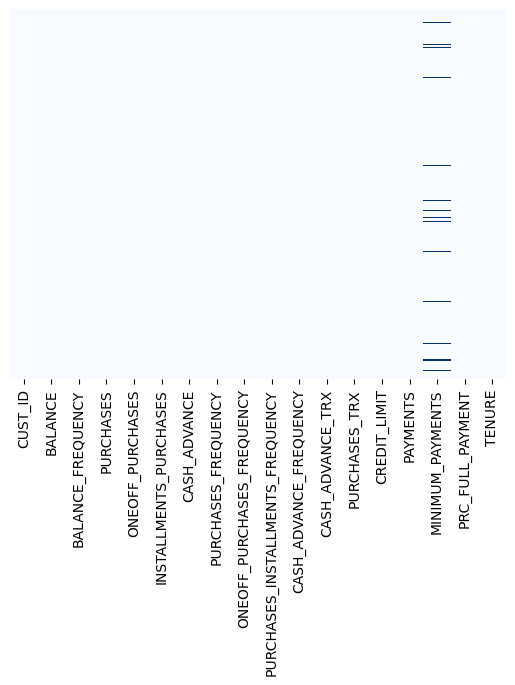

In [7]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [8]:
creditcard_df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' and 'CREDIT_LIMIT'
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean(), inplace=True)
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(), inplace=True)

In [10]:
creditcard_df.isnull().sum().sum()

0

In [11]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [12]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

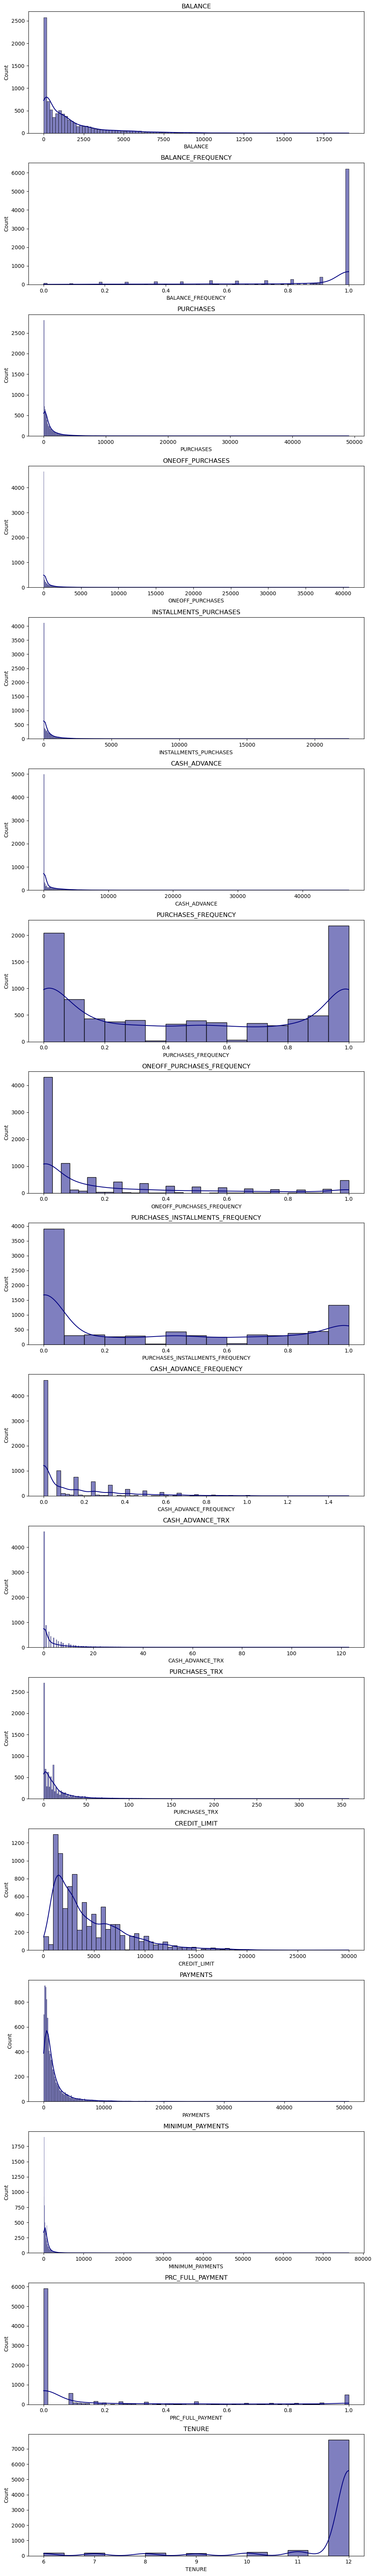

In [13]:
# Visualize the distribution of each column in our dataset.

# Mean balance is approximately $1500.
# Most customers frequently update their 'Balance_Frequency' (around 1).
# 'PURCHASES_FREQUENCY' reveals two distinct customer groups.
# Few customers make one-off or installment purchases frequently.
# Only a small number pay their balance in full ('PRC_FULL_PAYMENT' is close to 0).
# The average credit limit is around $4500.
# Most customers have approximately 11 years of tenure.

# Let's create subplots to visualize these distributions.
n_col = len(creditcard_df.columns)
fig, axes = plt.subplots(n_col, 1, figsize=(10, 4 * n_col))
for i, col in enumerate(creditcard_df.columns):
    ax = axes[i]
    sns.histplot(creditcard_df[col], color="navy", kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()

<AxesSubplot:>

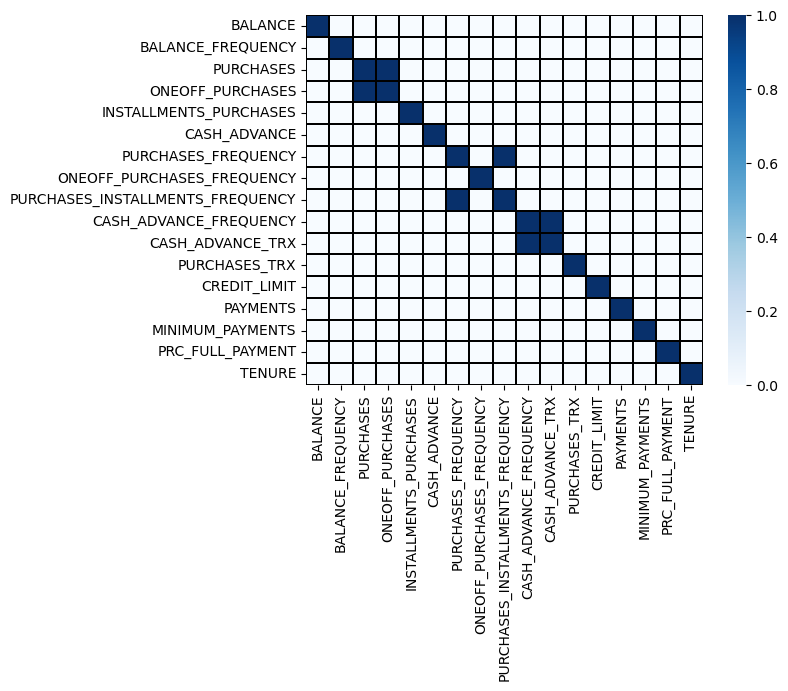

In [14]:
# Visualize strong positive correlations in our dataset using a heatmap.

# We observe high positive correlations:
# - Between 'PURCHASES' and 'ONEOFF_PURCHASES' & 'INSTALMENT_PURCHASES'
# - 'PURCHASES' is strongly correlated with one-off purchases, installment purchases, purchase transactions, credit limit, and payments.
# - There's a strong positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.

sns.heatmap(creditcard_df.corr() > 0.7, cmap='Blues', linecolor='black', linewidths=0.3)

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [15]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled[:2]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
         2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
         0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
         0.2342269 ,  0.36067954]])

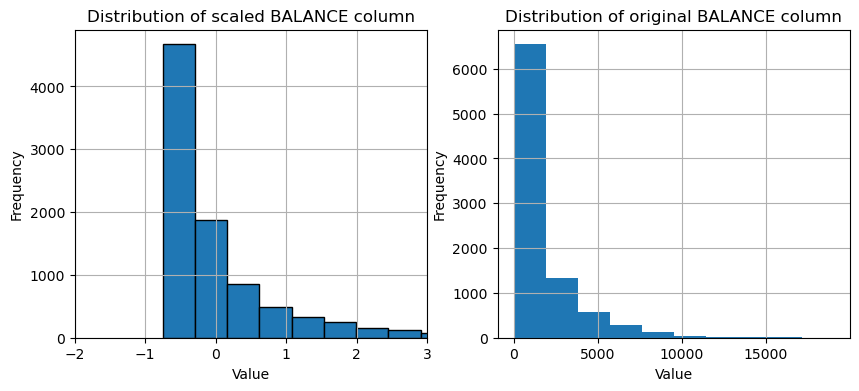

In [16]:
# The StandardScaler scales the features to have a mean of 0 and a standard deviation of 1.
# Visualize the difference between the original and scaled BALANCE column.

# Extract the first column after scaling
first_column = creditcard_df_scaled[:, 0]

# Create a subplot with two histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram of the scaled BALANCE column
ax1.hist(first_column, bins=20, edgecolor='black')
ax1.set_title('Distribution of scaled BALANCE column')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_xlim(-2, 3)
ax1.set_xticks(np.arange(-2, 4, 1))
ax1.grid(True)

# Plot the histogram of the original BALANCE column
creditcard_df['BALANCE'].plot(kind='hist', ax=ax2)
ax2.set_title('Distribution of original BALANCE column')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.grid(True)

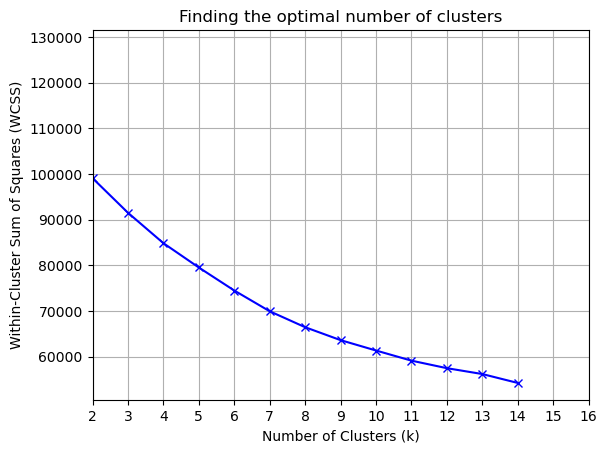

In [17]:
# Apply the Elbow method to find the optimal number of clusters.

wcss_scores = []  # Initialize a list to store the within-cluster sum of squares (WCSS)

# Try different values of k from 2 to 16
for k in range(2, 17):
    kmeans = KMeans(n_clusters=k)  # Create a K-Means model with k clusters
    kmeans.fit(creditcard_df_scaled)  # Fit the model to the scaled data
    wcss_scores.append(kmeans.inertia_)  # Append the WCSS to the list

# Plot the WCSS scores to visualize the "elbow"
plt.plot(wcss_scores, 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xlim(2, 16)
plt.xticks(range(2, 17))
plt.grid(True)

# Observing the plot, it seems that the "elbow" occurs around 4 clusters.
# However, the reduction in WCSS is not linear until 8 clusters.
# Let's choose 8 clusters as the optimal number for our K-Means model.

# TASK #6: APPLY K-MEANS METHOD

In [18]:
# Create a K-Means model with 8 clusters and fit it to the scaled data
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [19]:
kmeans.cluster_centers_.shape

(8, 17)

In [20]:
# Create a DataFrame for the original data
clustered_data = creditcard_df.copy()

# Add the "Cluster" column to the DataFrame
clustered_data['Cluster'] = labels

# Use groupby and agg to find the mean values for each cluster
cluster_centers = clustered_data.groupby('Cluster').agg('mean')

# Display the DataFrame with cluster centers
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,109.274657,0.367138,325.842925,201.357247,124.718463,319.521320,0.264990,0.072899,0.182918,0.037009,0.727843,4.093333,3722.810897,1080.037136,269.757680,0.229655,11.306667
1,3010.790424,0.950483,231.476796,163.125148,68.380247,2692.660580,0.164865,0.085582,0.084795,0.418349,9.683690,3.236409,5201.198143,1774.949695,1210.040854,0.029973,10.961285
2,3748.087171,0.987497,6301.320028,3553.614482,2749.386218,630.105832,0.957143,0.657737,0.869094,0.077005,2.042017,91.593838,9164.705882,5838.596579,2594.811222,0.226355,11.969188
3,6173.754313,0.972956,788.993627,469.395718,319.766549,7240.832746,0.393823,0.182399,0.289903,0.576160,21.357683,12.047859,9815.491184,6147.005475,2707.047881,0.049655,11.627204
4,747.951746,0.950450,887.210086,167.338640,720.442941,216.259589,0.897379,0.079652,0.846655,0.040489,0.765326,18.581897,3351.215701,1039.726448,709.483148,0.266670,11.477490
5,1304.431086,0.967536,280.936156,221.506346,59.633465,469.192753,0.173675,0.096508,0.077829,0.102594,1.786831,3.158025,3067.105624,864.513071,729.362094,0.021586,11.710700
6,1336.788529,0.971796,2171.344833,1699.438292,471.906541,305.717558,0.888418,0.761274,0.451462,0.054070,1.017167,30.454077,6145.518533,2157.193331,505.168665,0.278539,11.811159
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [21]:
# It's time to interpret our clustered dataset!
# Let's explore the distinct characteristics of each cluster:

# Cluster 0: "Low Spenders" - Customers with low average balance and moderate purchasing activity.
# Cluster 1: "Credit Card Holders" - Customers with higher average balances, frequent updates, and moderate spending patterns.
# Cluster 2: "Big Spenders" - High-value customers with substantial balances and significant purchasing and cash advance activity.
# Cluster 3: "Frequent Shoppers" - Customers with moderate balances, frequent updates, and a strong inclination for substantial purchases.
# Cluster 4: "High-Value Shoppers" - High-value customers with extensive balances and strong preferences for substantial purchasing.
# Cluster 5: "Moderate Shoppers" - Customers with moderate balances and high frequency of balance updates, favoring moderate to high spending.
# Cluster 6: "Cash Advance Users" - Customers with low balances, low update frequency, and a strong preference for cash advances.
# Cluster 7: "Credit Card Users" - Customers with low balances, low update frequency, and a significant preference for cash advances and lower credit utilization.

# These insights help us understand and segment our customer base for targeted strategies.

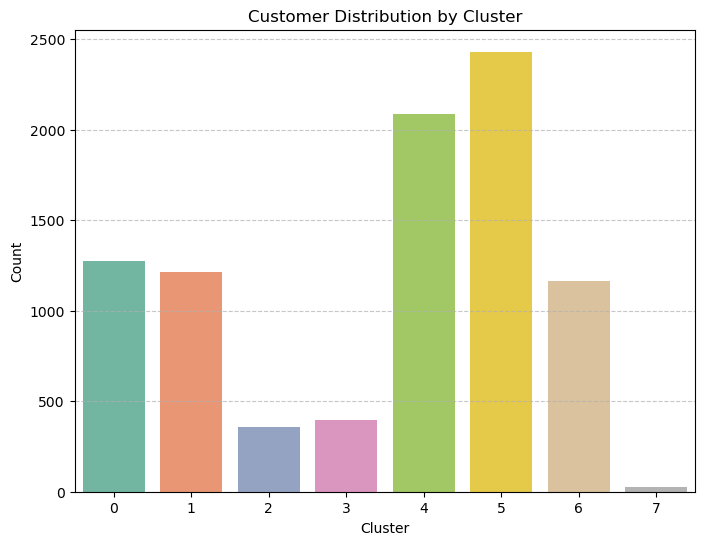

In [22]:
# Let's visualize the distribution of our customers by their cluster.

# This bar chart shows the count of customers in each cluster, aiding in customer segmentation and tailored strategies.
plt.figure(figsize=(8, 6))
sns.countplot(data=clustered_data, x='Cluster', palette='Set2')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# High-Value Customers (Cluster 2) are the largest segment, 
# while Rare Customers (Cluster 7) and Unique Shoppers (Cluster 4) are the smallest, 
# emphasizing the need for tailored strategies for each segment

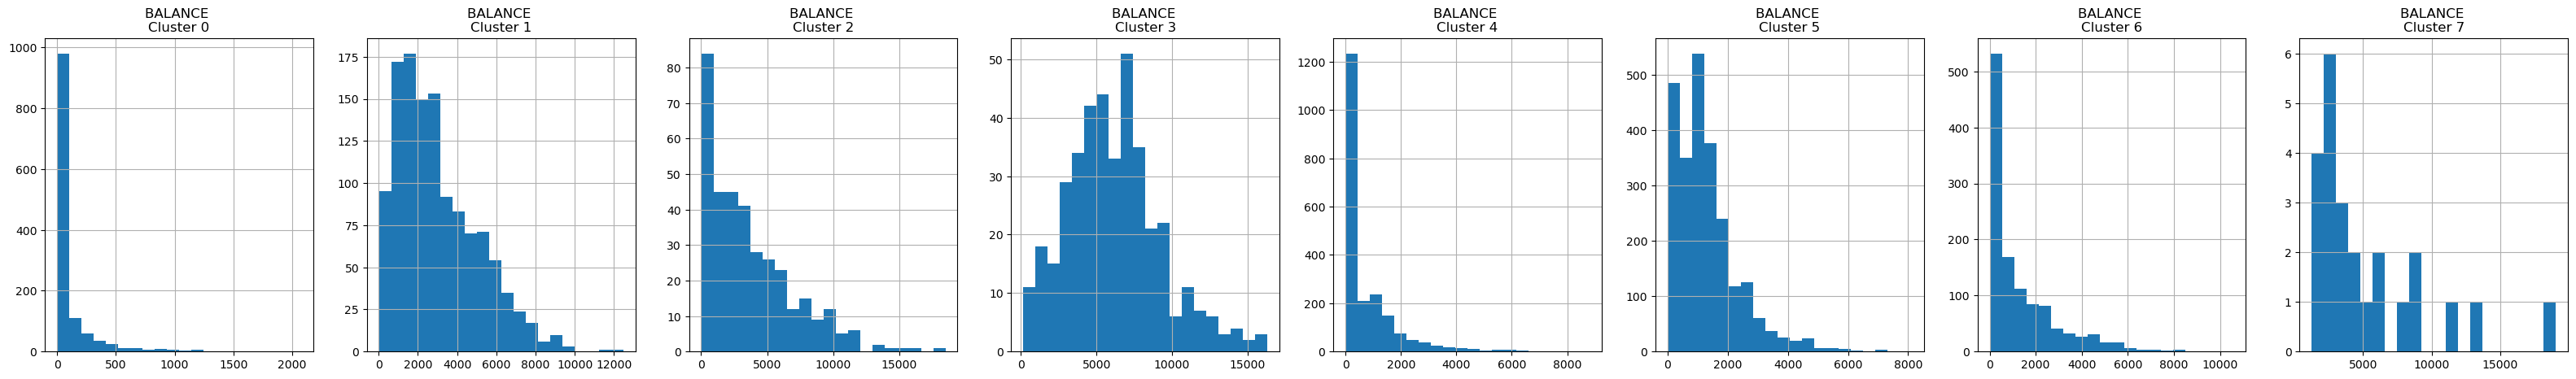

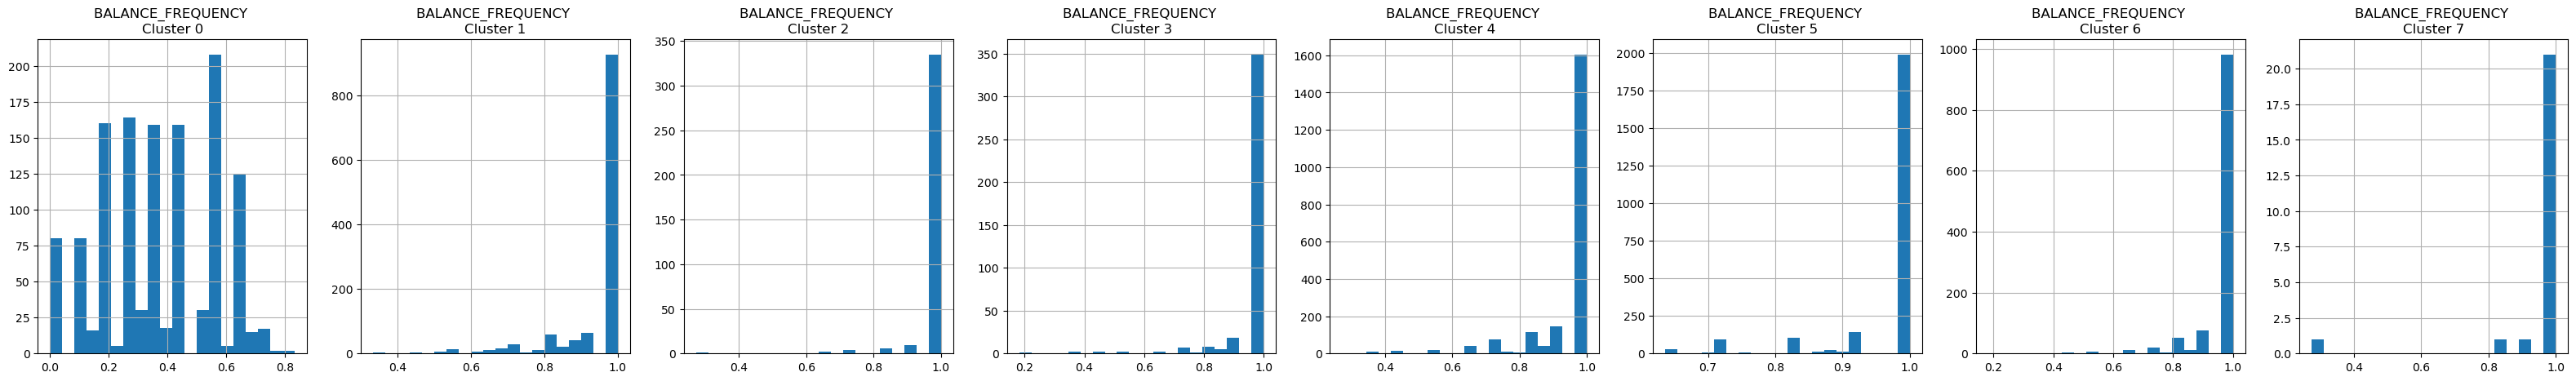

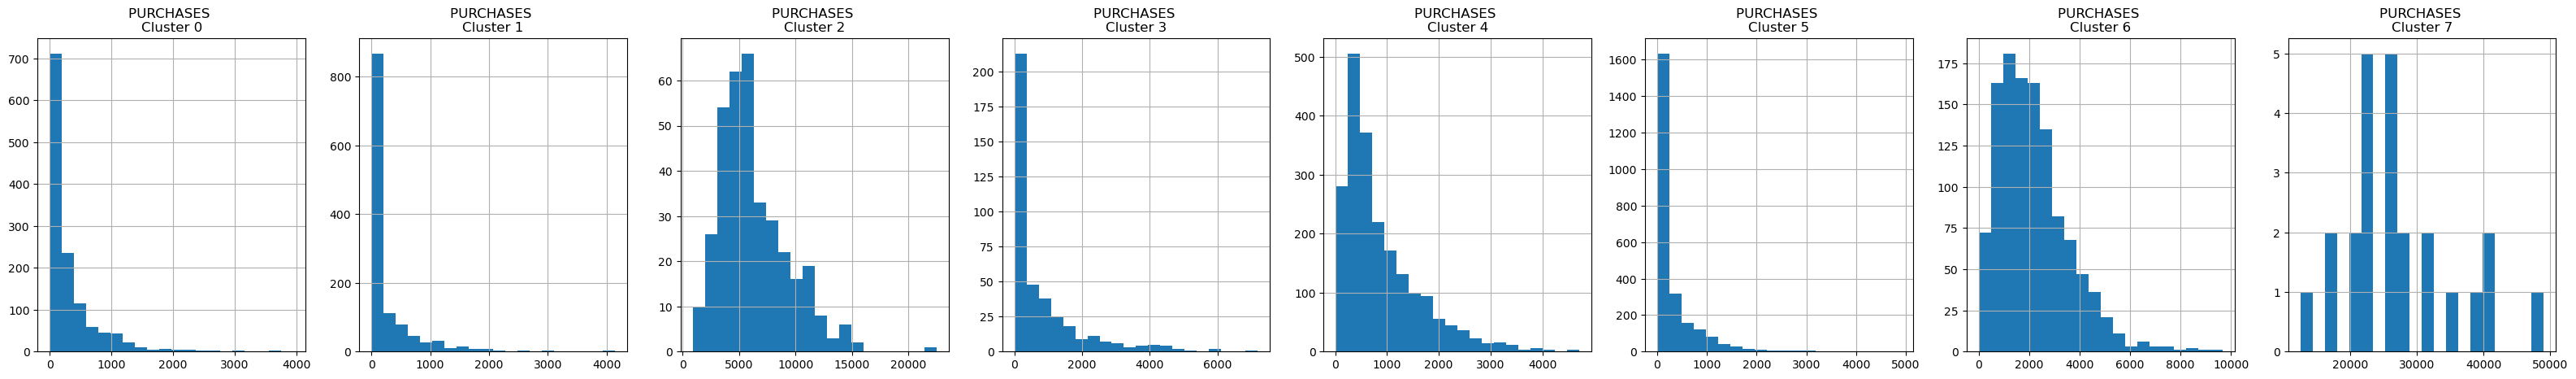

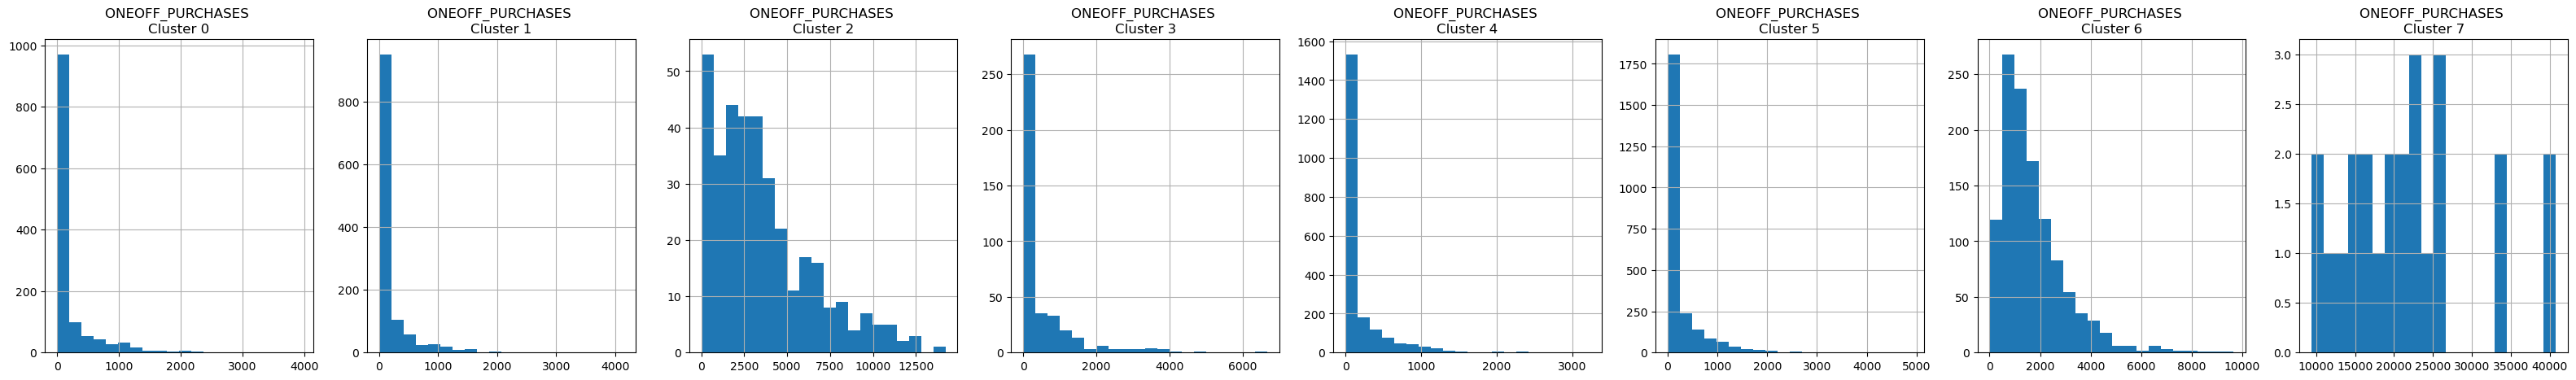

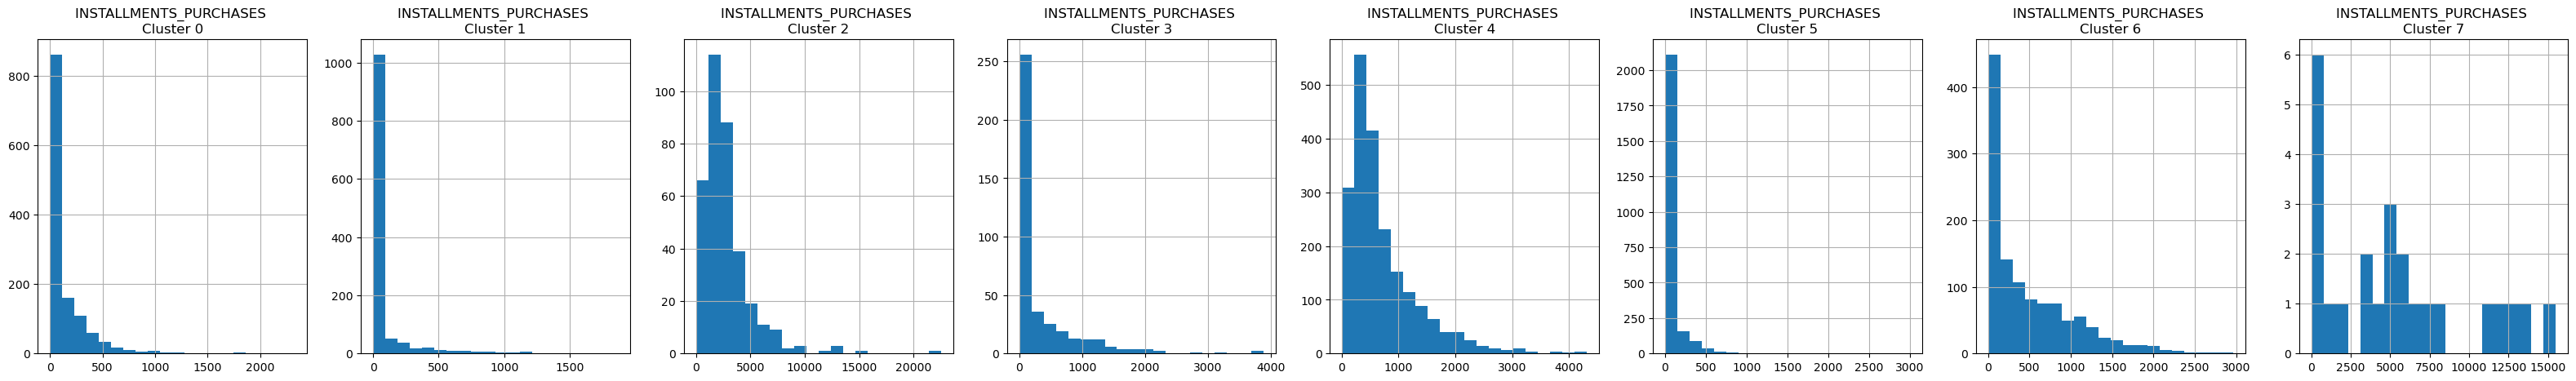

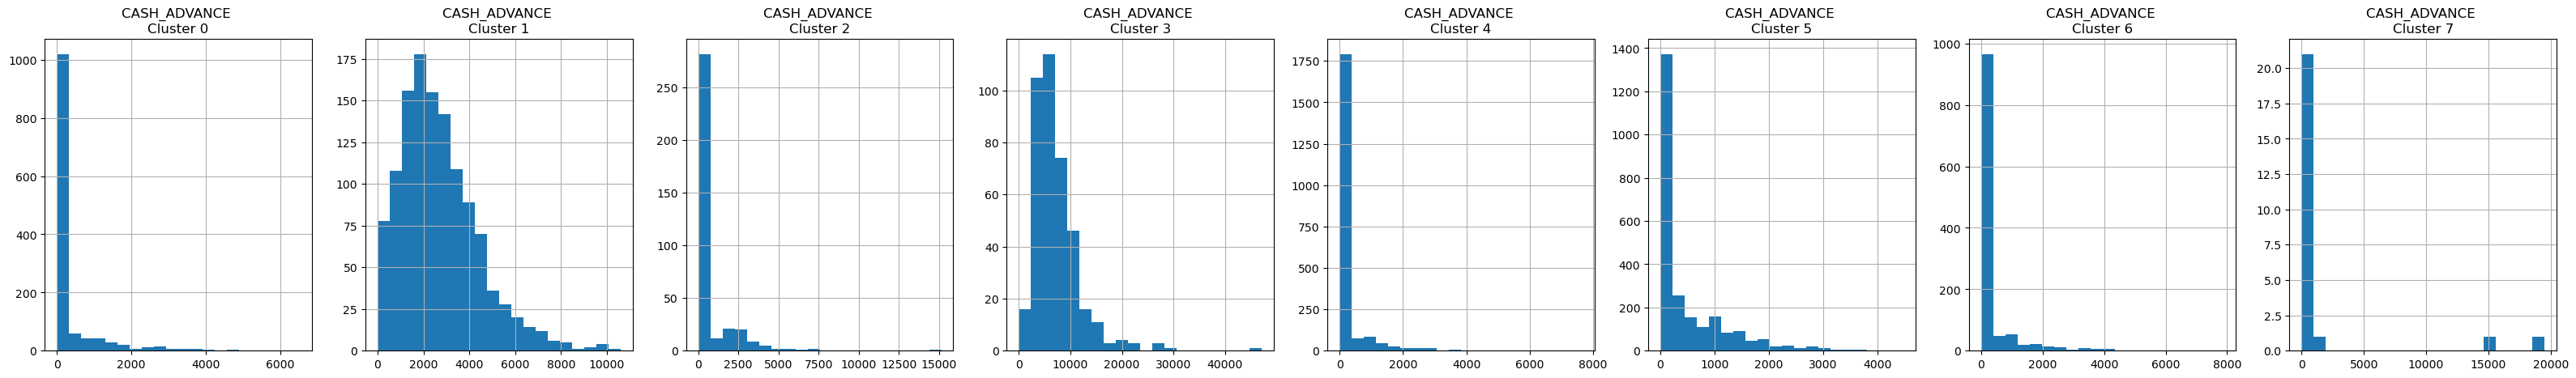

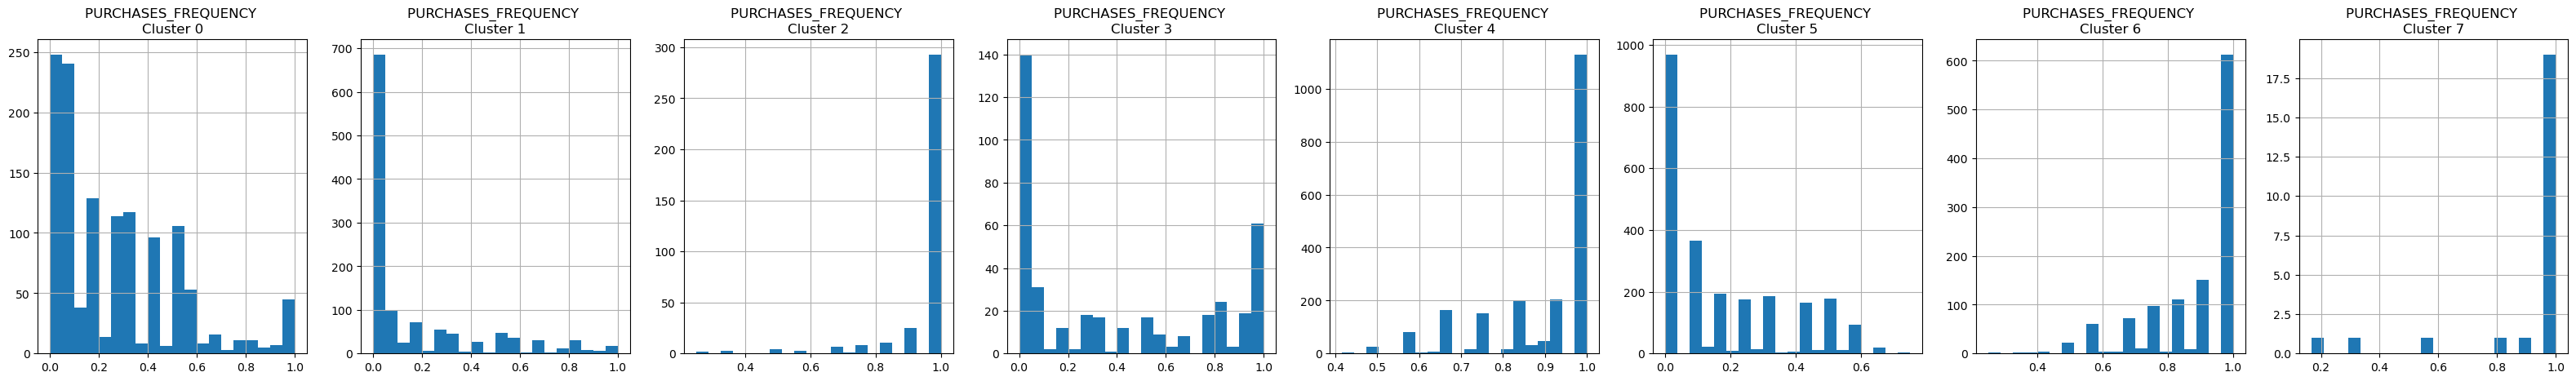

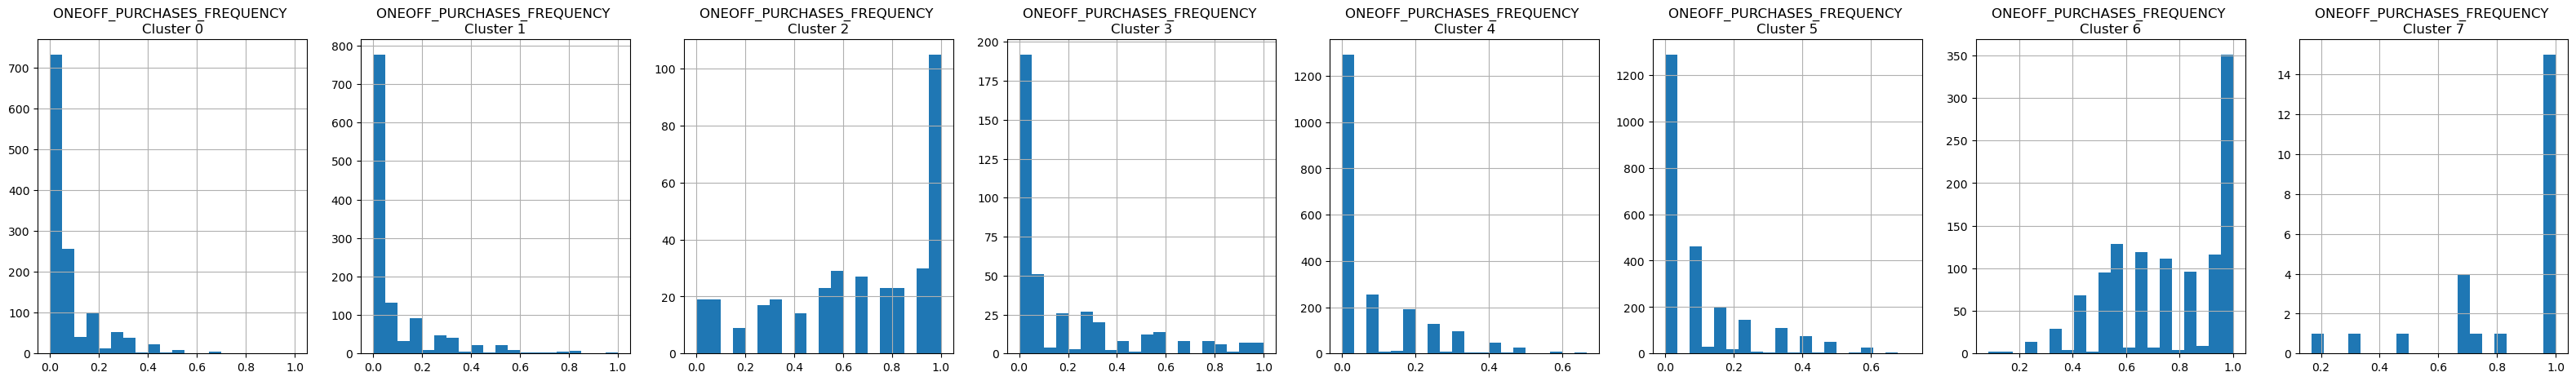

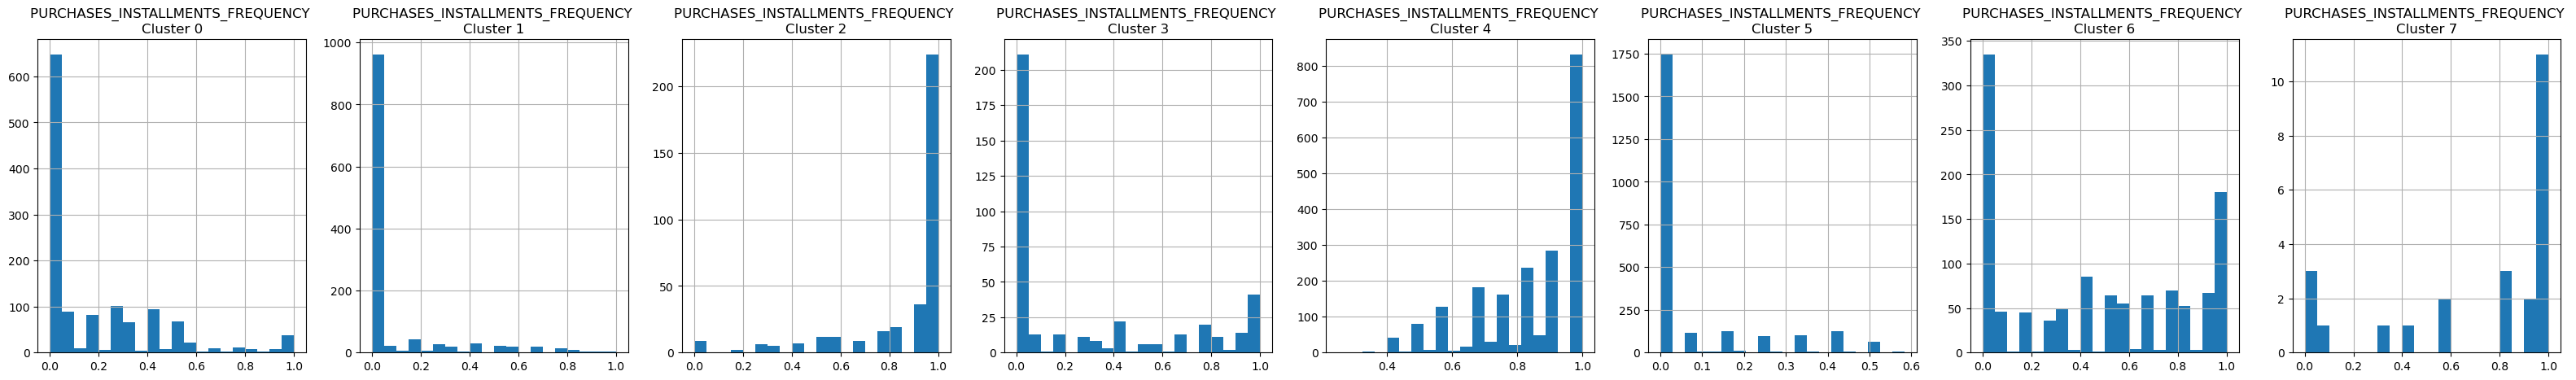

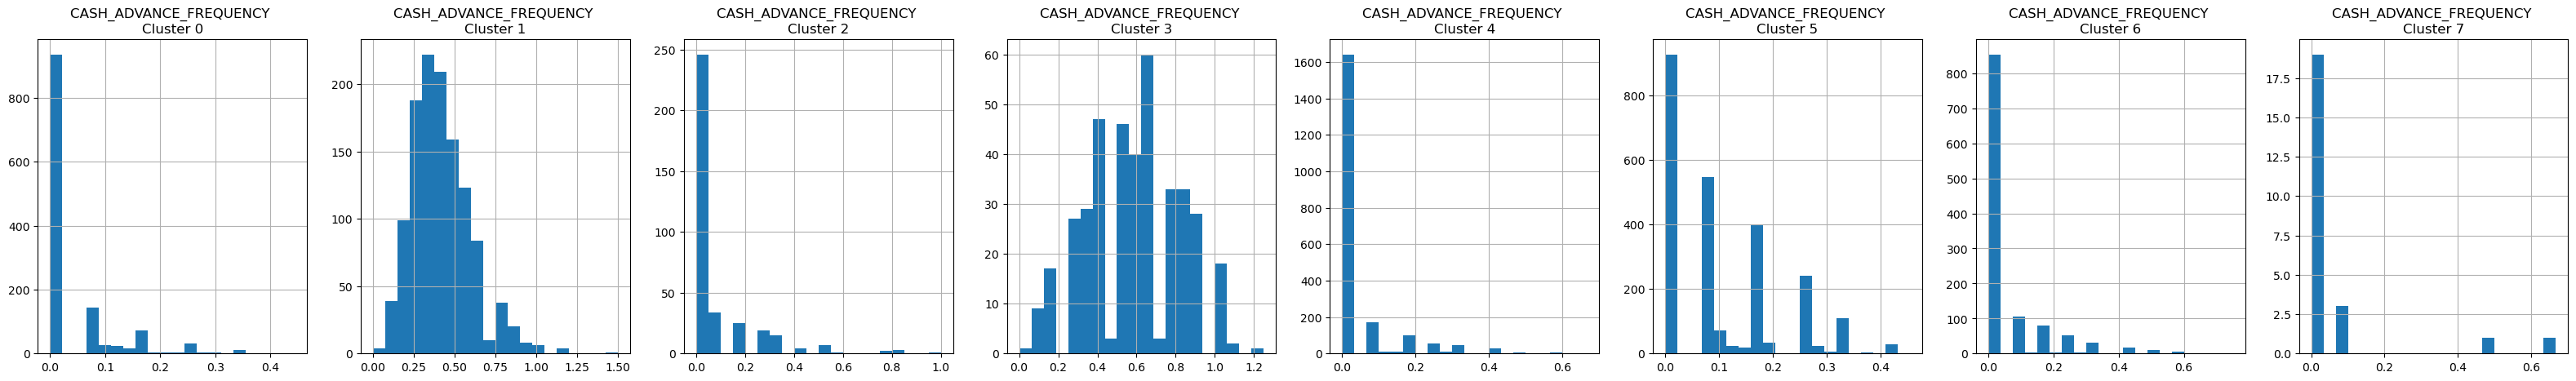

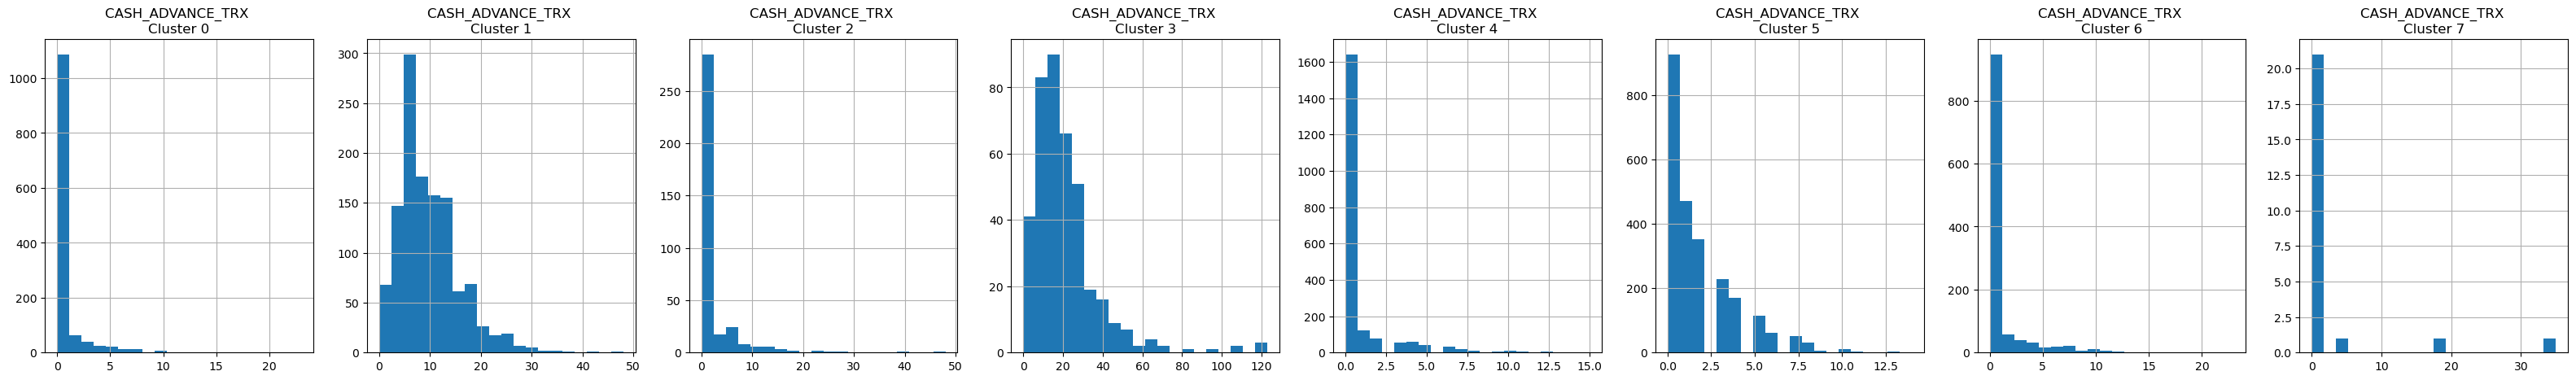

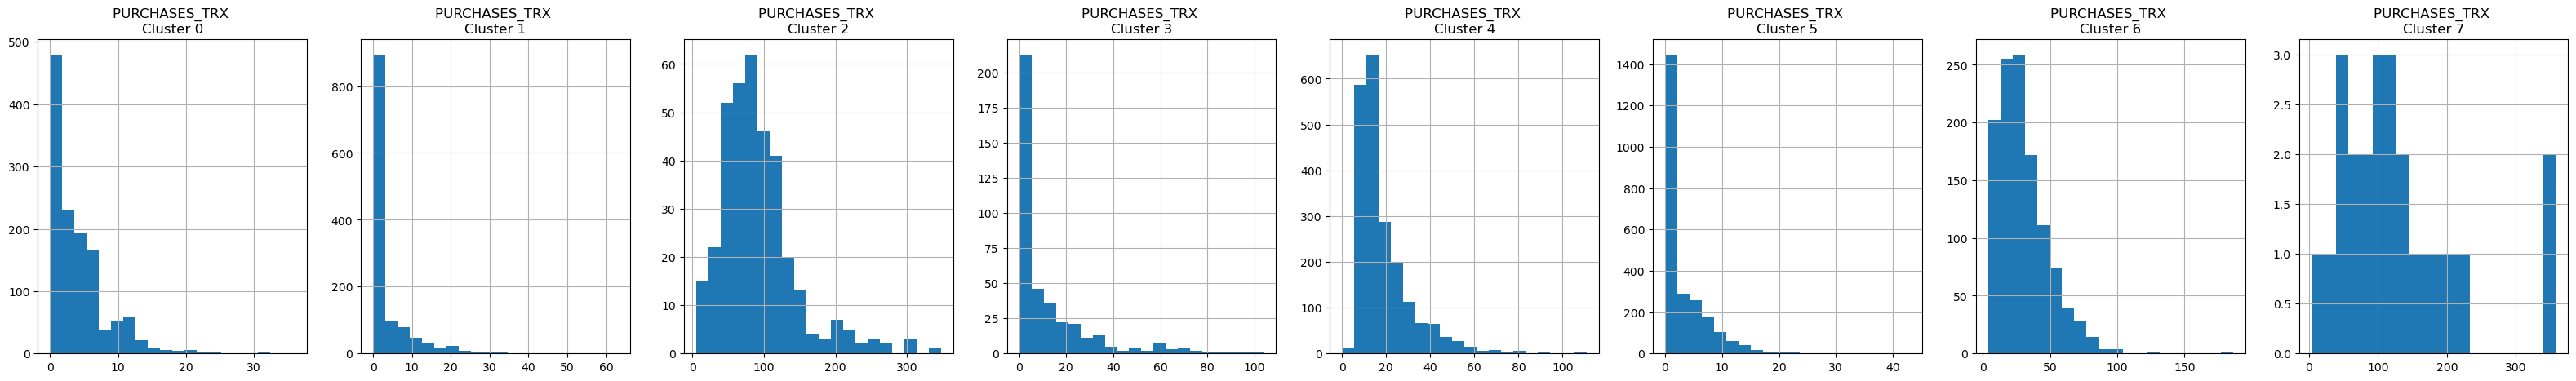

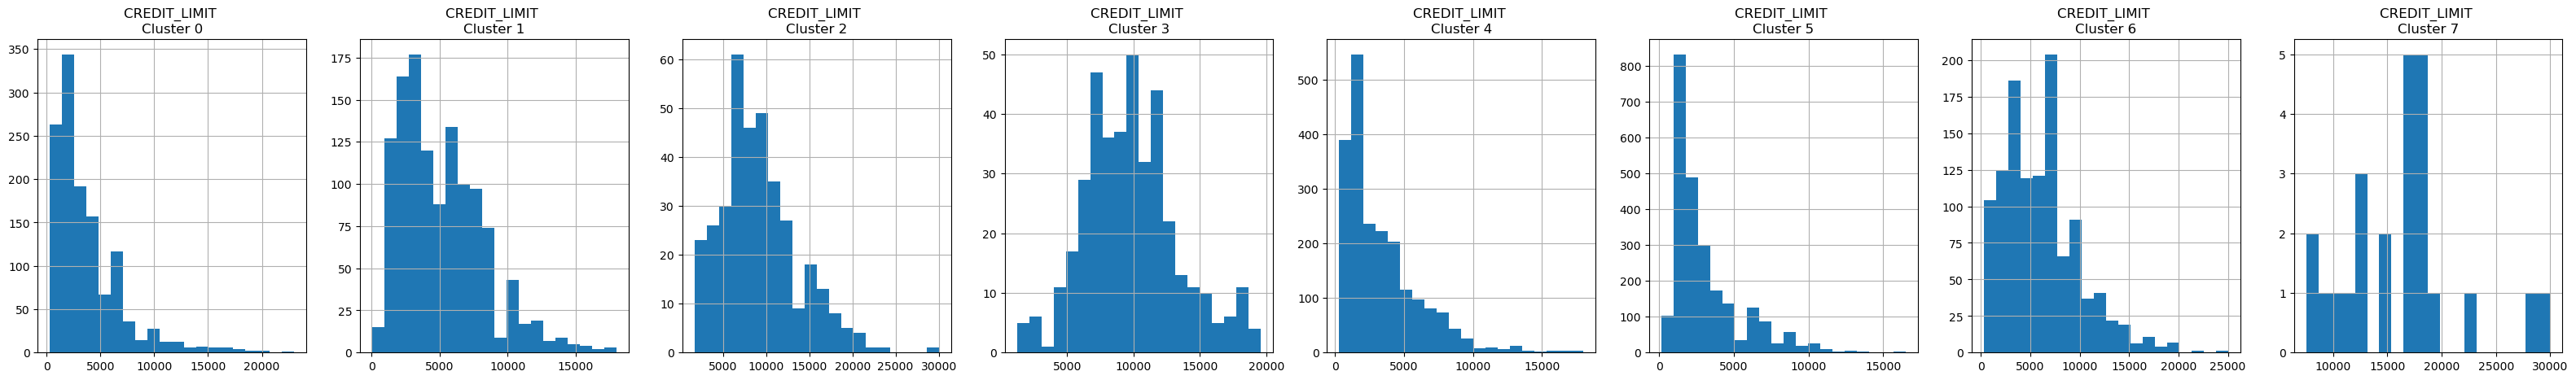

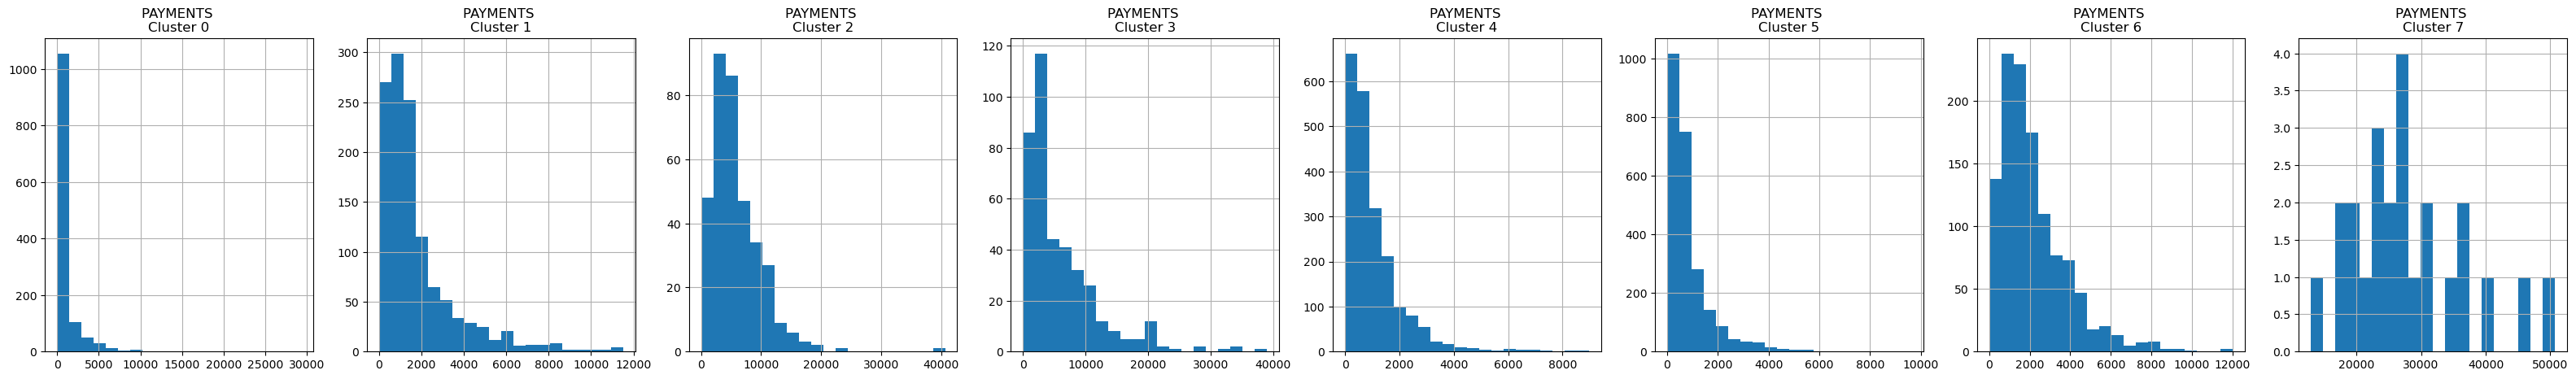

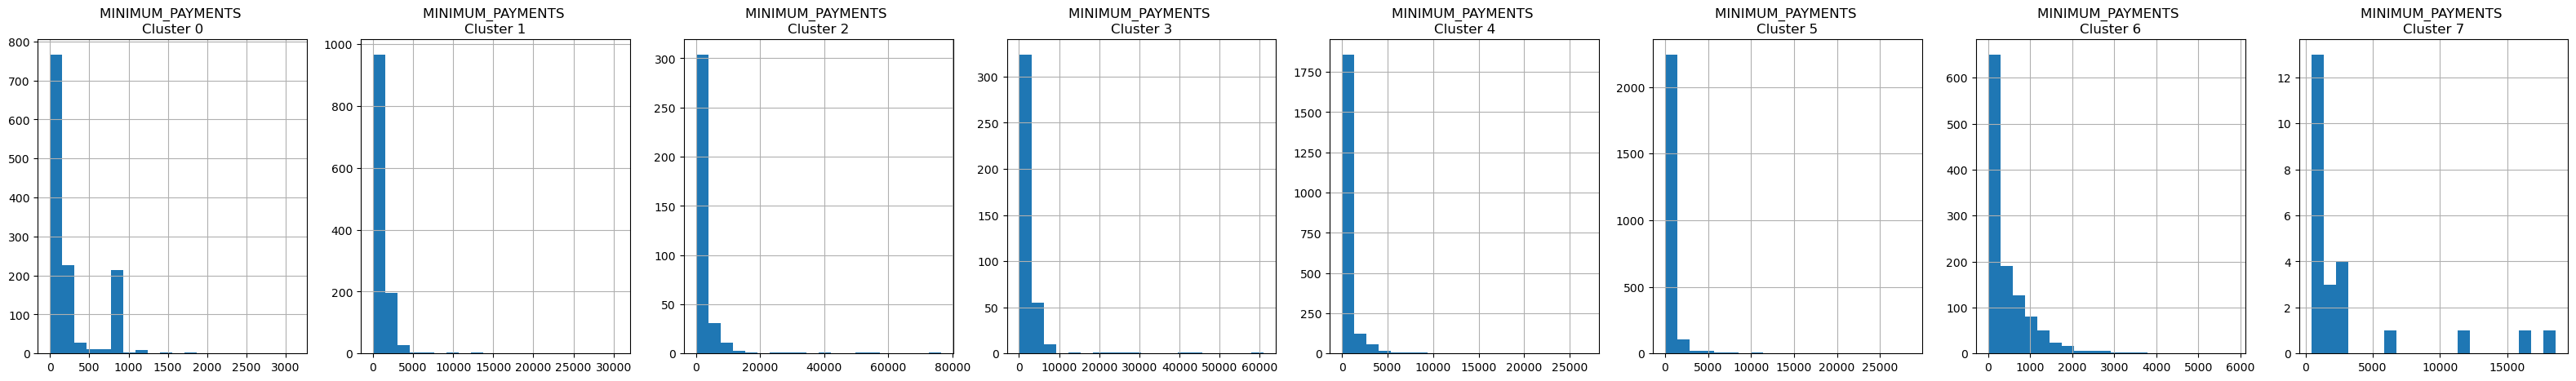

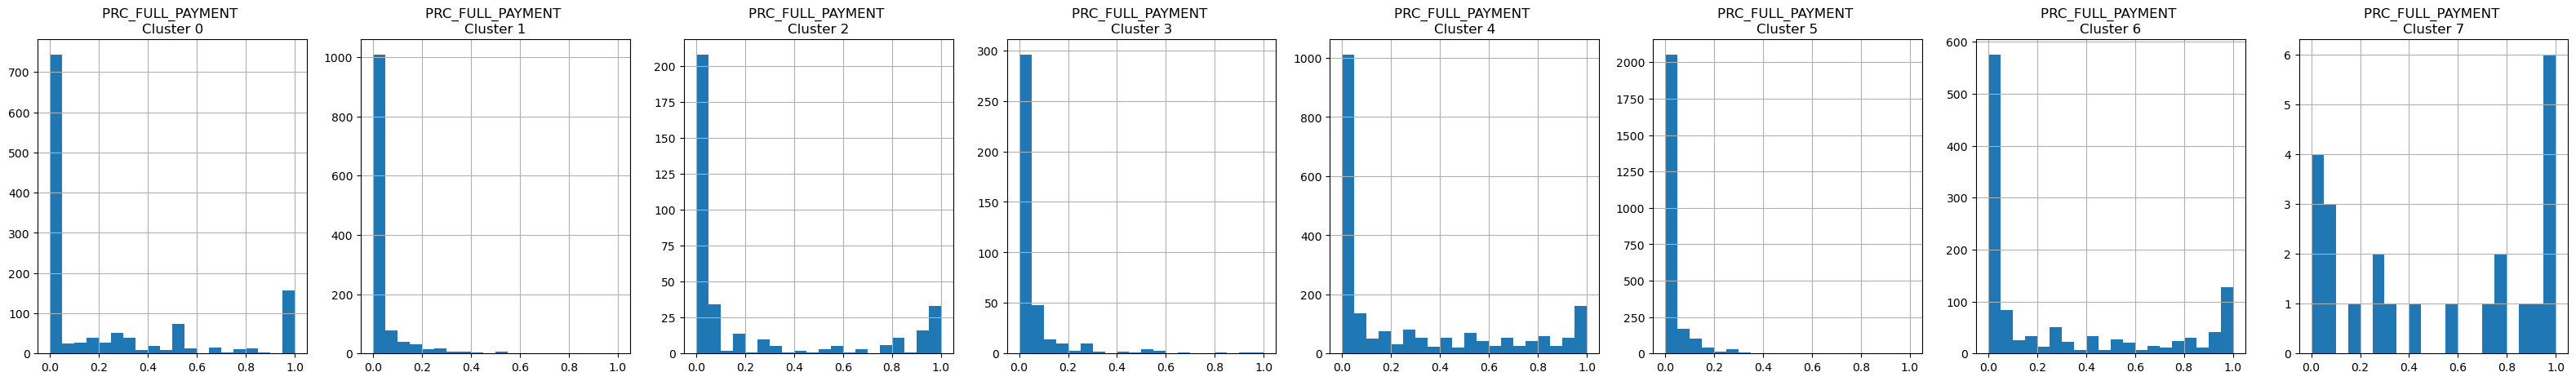

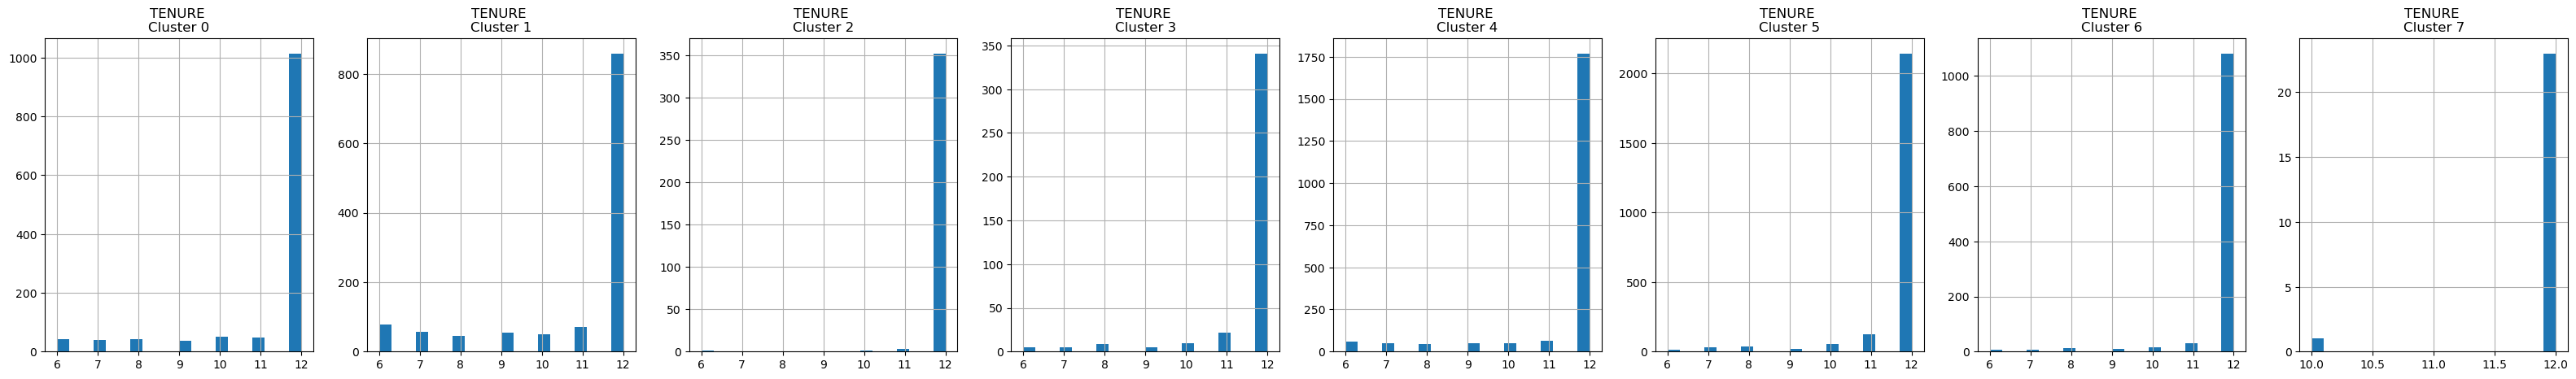

In [23]:
# Create histograms for various features within each cluster
for i in creditcard_df.columns:
    plt.figure(figsize= (40,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = clustered_data[clustered_data.Cluster == j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \nCluster {j}')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


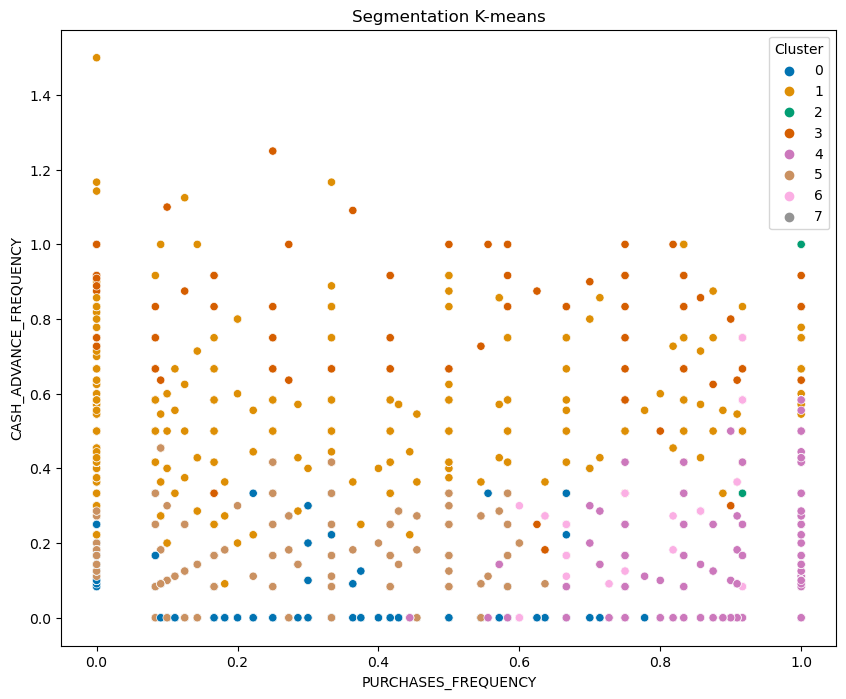

In [24]:
# Let's visualize the relationship between 'PURCHASES_FREQUENCY' and 'CASH_ADVANCE_FREQUENCY' within customer clusters using K-means.
# The plot demonstrates how K-means clustering helps identify distinct customer segments, which might not be evident through simple feature analysis.
x_axis = clustered_data['PURCHASES_FREQUENCY']
y_axis = clustered_data['CASH_ADVANCE_FREQUENCY']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = clustered_data['Cluster'], palette = 'colorblind')
plt.title('Segmentation K-means')
plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

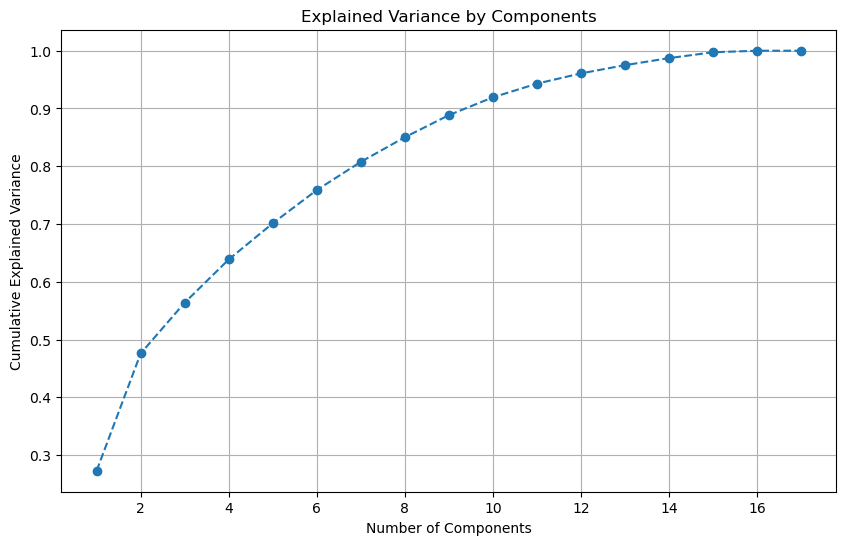

In [25]:
# Perform Principal Component Analysis (PCA) on the scaled data to improve cluster visualizations.
pca = PCA()
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Access the explained variance ratio for each component from the PCA object.
explained_variance_ratio = pca.explained_variance_ratio_

# Create a dynamic range for the x-axis based on the number of components.
n_components = len(explained_variance_ratio)
components_range = range(1, n_components + 1)

# Create a plot to visualize the cumulative explained variance as the number of components increases.
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# The purpose of this step is to improve visualizations of customer clusters by understanding how many principal components are needed
# to capture a significant portion of the original data's variance, facilitating more informative and effective cluster representations.

# A rule of thumb is to keep at least 70 to 80 percent of the explained variance.
# 80% of the variance of the data is explained by the first 7 components.
# But for now, we'll use only the first 2 components to make better visualizations.

In [26]:
# Let's perform (PCA) to reduce dimensionality to two components.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Create a DataFrame to store the two principal components.
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138298,2.506464
2,0.969682,-0.383524
3,-0.873627,0.043164
4,-1.599434,-0.688581


In [27]:
# Create a DataFrame to store the principal components with respect to the original features.
pca_components_df = pd.DataFrame(data=pca.components_,
                                columns=creditcard_df.columns,
                                index=['pca1', 'pca2'])
pca_components_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
pca1,0.101077,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081020
pca2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439241,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257477,0.166970,-0.190026,-0.004327


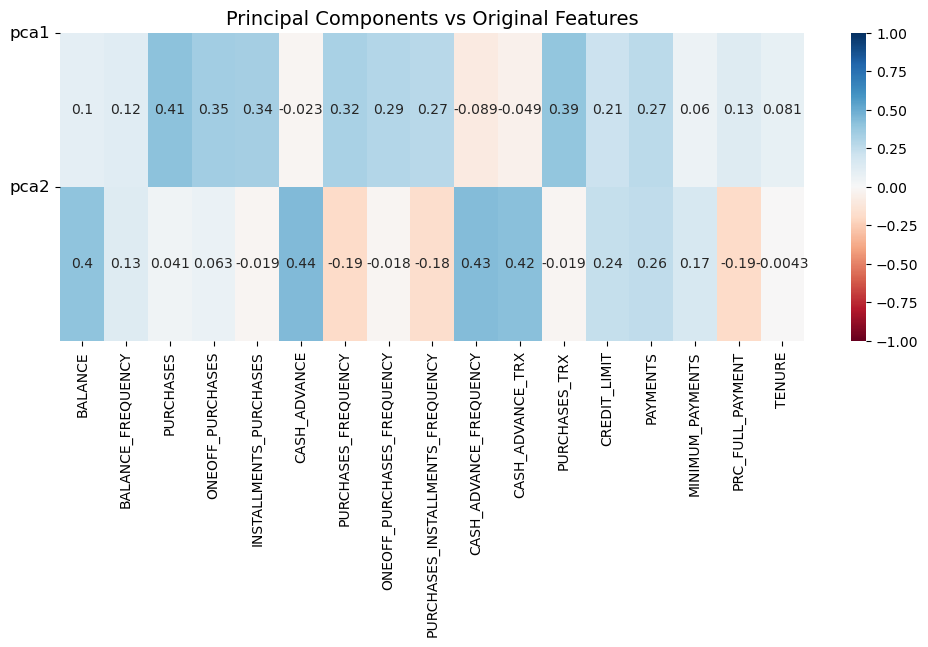

In [28]:
# Create a heatmap to visualize the relationships between principal components and original features.
plt.figure(figsize=(12, 4))
sns.heatmap(pca_components_df,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.yticks([0, 1],
           ['pca1', 'pca2'],
           rotation=0,
           fontsize=12)
plt.title('Principal Components vs Original Features', fontsize=14)
plt.show()

# Based on these findings, 'pca1' primarily represents purchasing behavior and credit usage, 
# with strong associations to 'PURCHASES,' 'PURCHASES_TRX,' and 'PURCHASES_FREQUENCY.'

# Meanwhile, 'pca2' is linked to cash advance behavior and payment frequencies, 
# showing strong correlations with 'CASH_ADVANCE' and 'CASH_ADVANCE_FREQUENCY.'

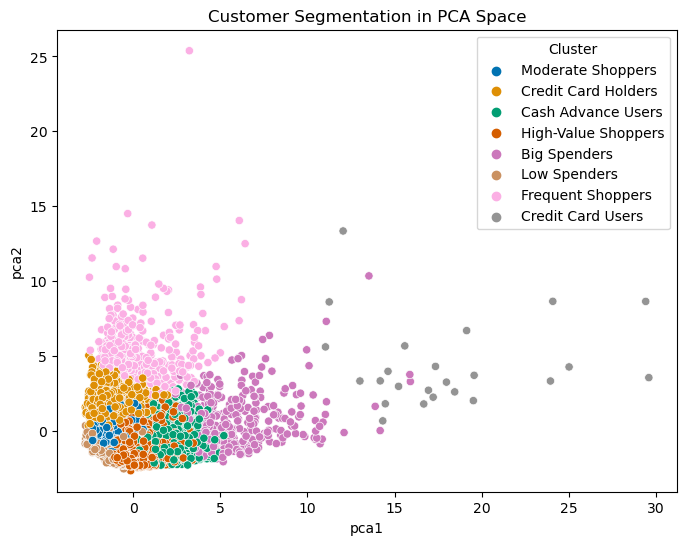

In [29]:
# Let's visualize our customer segmentation in PCA space.

# Concatenate the cluster labels to the DataFrame
pca_df['Cluster'] = labels

# Define a mapping from cluster numbers to cluster names
cluster_names = {
    0: 'Low Spenders',
    1: 'Credit Card Holders',
    2: 'Big Spenders',
    3: 'Frequent Shoppers',
    4: 'High-Value Shoppers',
    5: 'Moderate Shoppers',
    6: 'Cash Advance Users',
    7: 'Credit Card Users'
}

# Map the cluster names to the 'Cluster' column in pca_df
pca_df['Cluster'] = pca_df['Cluster'].map(cluster_names)

# Visualize the clusters in the pca_df using a scatterplot.
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_df, palette='colorblind')
plt.title('Customer Segmentation in PCA Space')
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [30]:
# Let's add necessary libraries to perform autoencoding using TensorFlow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [31]:
# Set the encoding dimension for the autoencoder
encoding_dim = 7

# Define the input layer
input_df = Input(shape=(17,))

# Build the layers for the autoencoder
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Create the autoencoder model
autoencoder = Model(input_df, decoded)

# Create the encoder model for dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [32]:
creditcard_df_scaled.shape

(8950, 17)

In [33]:
# Train the autoencoder
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 60ms/step - loss: 0.5211
Epoch 2/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2902
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2331
Epoch 4/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1965
Epoch 5/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1808
Epoch 6/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1528
Epoch 7/25
70/70 [==============================] - 5s 71ms/step - loss: 0.1376
Epoch 8/25
70/70 [==============================] - 5s 68ms/step - loss: 0.1216
Epoch 9/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1079
Epoch 10/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1020
Epoch 11/25
70/70 [==============================] - 5s 74ms/step - loss: 0.1032
Epoch 12/25
70/70 [==============================] - 4s 61ms/step - loss: 0.0955
Epoch 13/25
70/70 [==================

In [34]:
# Display the summary of the autoencoder
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [35]:
# Use the encoder to get the reduced dimension representation
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 [==============================] - 2s 5ms/step


(8950, 10)

In [36]:
# Let's scale the data first
scaler = StandardScaler()
pred_scaled = scaler.fit_transform(pred)

C:\Users\stask\AppData\Local\Temp\ipykernel_17840\2659244186.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_scores, 'bx-', color='r', label='Original Data')
C:\Users\stask\AppData\Local\Temp\ipykernel_17840\2659244186.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_scores_2, 'bx-', color='g', label='After Autoencoder')


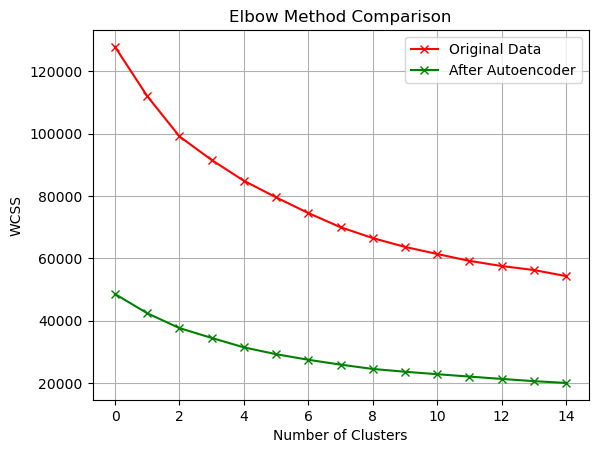

In [47]:
# Let's apply our Elbow method
wcss_scores_2 = []
k_ranges = range(2, 17)
# with k=1 rises an error AttributeError: 'NoneType' object has no attribute 'split'
for i in k_ranges:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred_scaled)
    wcss_scores_2.append(kmeans.inertia_)

# Let's compare the difference between clustering with autoencoder and without
# Plotting WCSS for the original dataset
plt.plot(wcss_scores, 'bx-', color='r', label='Original Data')

# Plotting WCSS after implementing autoencoder
plt.plot(wcss_scores_2, 'bx-', color='g', label='After Autoencoder')

plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Comparison')
plt.legend()
plt.show()

# Now we can use 4 clusters for k-means; 
# However, the reduction in WCSS is getting linear after 6 cluster.

In [56]:
# Perform K-Means clustering with 4 clusters on the dimension-reduced data
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [58]:
# Create a DataFrame for the original data
clustered_data_2 = creditcard_df.copy()

# Add the "Cluster" column to the DataFrame
clustered_data_2['Cluster'] = labels

# Use groupby and agg to find the mean values for each cluster
cluster_centers_2 = clustered_data_2.groupby('Cluster').agg('mean')

# Display the DataFrame with cluster centers
cluster_centers_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1049.773549,0.904656,1961.020082,1079.520567,881.534538,246.635915,0.903290,0.405420,0.721115,0.051357,0.940163,30.775612,5360.587310,1991.712215,580.018471,0.375196,11.281052
1,1196.767456,0.865536,394.286046,242.951767,151.686326,534.973338,0.348687,0.113656,0.241855,0.108810,2.161687,6.380202,3376.190280,905.920380,758.285376,0.075080,11.810266
2,3871.424086,0.863912,523.699334,329.565666,194.214827,4321.739595,0.288812,0.146920,0.178552,0.427535,12.711679,7.732664,7009.579375,3426.762966,1717.346235,0.071995,10.475365
3,4739.906664,0.971801,9988.953938,6395.783627,3596.279119,2911.458407,0.918934,0.707891,0.807884,0.176724,6.626943,106.129534,11918.393782,12540.893496,2261.500568,0.308789,11.854922


In [49]:
# Combine the original dataset with the cluster labels
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'Cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
# It's time to interpret our clustered dataset!
# Let's explore the distinct characteristics of each cluster:

# Cluster 0: "Moderate Spenders" - Customers with balanced spending and payments.

# Cluster 1: "Low Spenders with Cash Advances" - Customers who make smaller purchases, 
# rely on cash advances, and have lower credit limits.

# Cluster 2: "Heavy Cash Users" - Customers with higher balances who rely heavily on cash advances.

# Cluster 3: "High-Value Customers" - Customers with high balances and credit limits, 
# making substantial one-off purchases.

In [63]:
# Perform (PCA) to improve cluster visualizations.
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])

# Combine the PCA components with the cluster labels
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

# Map cluster labels to cluster names
cluster_names = {
    0: "Moderate Spenders",
    1: "Low Spenders",
    2: "Heavy Cash Users",
    3: "High-Value Customers"
}

# Add a new column "cluster_name" to the DataFrame
pca_df['cluster_name'] = pca_df['cluster'].map(cluster_names)
pca_df.head()

,pca1,pca2,cluster,cluster_name
0,-1.893290,-0.290688,1,Low Spenders
1,0.032099,1.893863,2,Heavy Cash Users
2,0.117628,-0.609289,1,Low Spenders
3,-1.269610,-0.113820,1,Low Spenders
4,-1.960369,-0.236180,1,Low Spenders


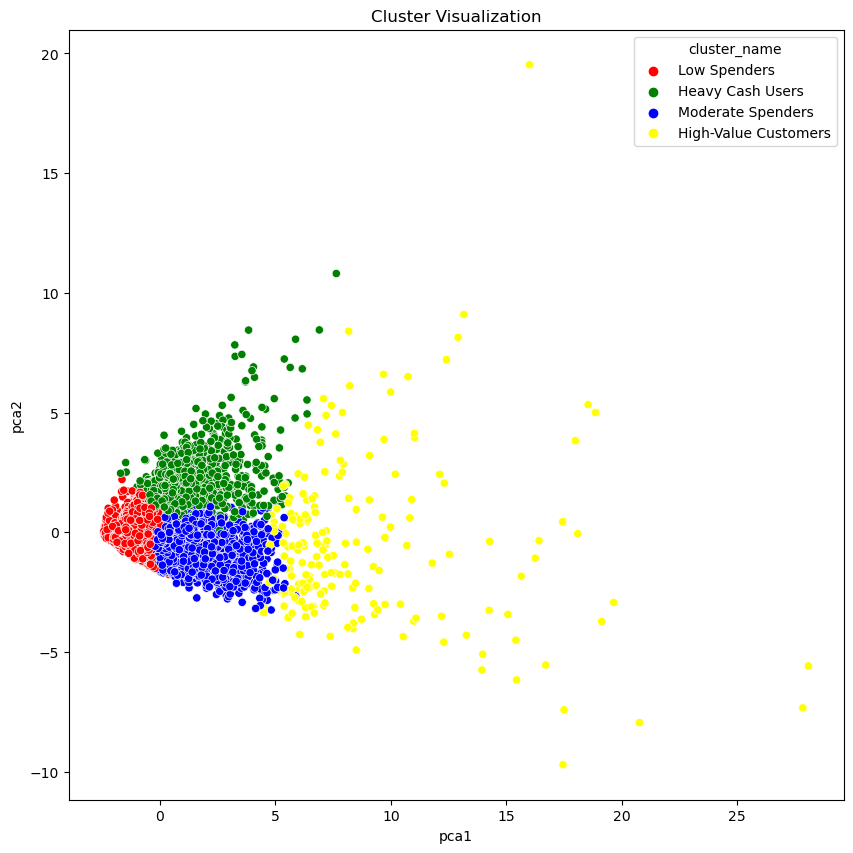

In [66]:
# Visualize the clusters in 2D space using a scatterplot for clear findings
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster_name", data=pca_df, palette=['red', 'green', 'blue', 'yellow'])
plt.title('Cluster Visualization')
plt.show()